# Tree Age Regression Problem

## importing all modules

In [64]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import scale
#from sklearn import cross_validation
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

import plotly   
from plotly.graph_objs import *
import plotly.offline as plot
import plotly.graph_objs as go
plot.offline.init_notebook_mode(connected=True)

# for OLS
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as sms

## importing files

In [65]:
Regression_Data = pd.read_csv('Ex02_TreeData_Regreesion.csv')

## Description of imported data

In [66]:
Regression_Data.describe()

,N0,Nt,pH,PetalCount,Age
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,15.185291,3.452463,5.990638,4.590000,244.453341
std,0.099542,0.998865,0.095833,0.494311,50.982339
min,14.927818,1.133692,5.803810,4.000000,151.991196
25%,15.106119,2.747087,5.919878,4.000000,204.301605
50%,15.192205,3.357409,5.975315,5.000000,241.336082
75%,15.249628,4.246761,6.056471,5.000000,273.111064
max,15.407726,5.889005,6.231370,5.000000,414.089924


In [67]:
# Min(age)=151, max(age)=414

## Correlation details

In [68]:
Regression_Data.corr()

,N0,Nt,pH,PetalCount,Age
N0,1.000000,0.080825,0.053488,0.127779,-0.058794
Nt,0.080825,1.000000,0.003821,-0.003614,-0.980478
pH,0.053488,0.003821,1.000000,0.099505,0.007455
PetalCount,0.127779,-0.003614,0.099505,1.000000,0.053744
Age,-0.058794,-0.980478,0.007455,0.053744,1.000000


## Coorelation Plot

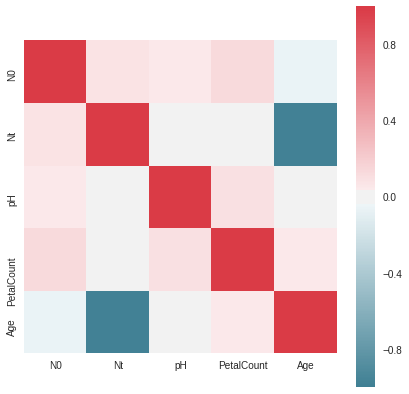

In [69]:
f, ax = plt.subplots(figsize = (7,7))
correlation = Regression_Data.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), 
            cmap = sns.diverging_palette(220, 10, as_cmap=True), square=True, ax = ax)
plt.show()


# Data

In [71]:
df_x = Regression_Data.drop(['Age'], axis = 1)
df_x['logNt'] = np.log(df_x['Nt'])

df_y = Regression_Data.drop(['N0', 'Nt', 'pH', 'PetalCount'], axis = 1)

## Train and Test Data

In [47]:
df_x_train = df_x.iloc[:-20]
df_y_train = df_y.iloc[:-20]

df_x_test = df_x.iloc[80:]
df_y_test = df_y.iloc[80:]
#df_x_test.head()

## Linear Regression

## Intercept and coefficients by taking all features

In [48]:
reg = linear_model.LinearRegression()
reg.fit(df_x_train,df_y_train)
coefficients = reg.coef_.tolist()
intercept = reg.intercept_.tolist()

In [49]:
mean_square_error = np.mean((reg.predict(df_x_test) - df_y_test)**2)
mean_square_error

Age    0.011099
dtype: float64

In [50]:
variance = reg.score(df_x_test, df_y_test)
variance

0.99999448669032376

# Scatter Plot

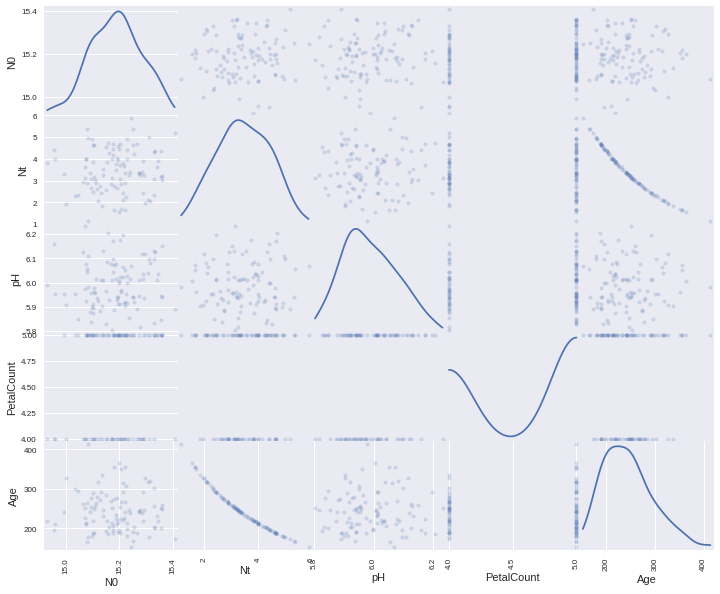

In [51]:
pd.scatter_matrix(Regression_Data, alpha=.2, figsize=(12,10), diagonal='kde')
plt.show()

# Feature Selection

## Ridge Regression

In [13]:
alphas = 10**(np.linspace(-5,0,100))
Ridge_df = pd.DataFrame()
model = Ridge()
coeff =  []
for a in alphas:
    model.set_params(alpha = a)
    model.fit(df_x_train, df_y_train)
    coeff.append(model.coef_)
    df = pd.DataFrame({'N0':[model.coef_[0][0]],'Nt':[model.coef_[0][1]],'pH':[model.coef_[0][2]],
                   'PetalCount':[model.coef_[0][3]], 'logNt':[model.coef_[0][4]]})
    Ridge_df = Ridge_df.append(df)

In [14]:
trace0 = Scatter(
    x = alphas,
    y = Ridge_df['N0'],
    name = 'N0',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
    )
trace1 = Scatter(
    x = alphas,
    y = Ridge_df['Nt'],
    name = 'Nt',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = Scatter(
    x = alphas,
    y = Ridge_df['pH'],
    name = 'pH',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas,
    y = Ridge_df['PetalCount'],
    name = 'Petal Count',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas,
    y = Ridge_df['logNt'],
    name = 'logNt',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4]

layout = dict(xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='RidgeRegression.html')

In [15]:
ridge2 = Ridge(alpha=0.005, normalize=True)
ridge2.fit(df_x_train, df_y_train.Age) # Fit a ridge regression on the training data
pred2 = ridge2.predict(df_x_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=df_x_train.columns)) # Print coefficients
print(mean_squared_error(df_y_test, pred2)) # Calculate the test MSE

N0              9.803491
Nt             -5.234256
pH             -0.453156
PetalCount      0.524534
logNt        -142.933520
dtype: float64
0.950837360159


In [16]:
ridge2 = Ridge(alpha=0.1, normalize=True)
ridge2.fit(df_x_train, df_y_train.Age) # Fit a ridge regression on the training data
pred2 = ridge2.predict(df_x_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=df_x_train.columns)) # Print coefficients
print(mean_squared_error(df_y_test, pred2)) # Calculate the test MSE

N0             5.142118
Nt           -20.000421
pH            -1.845986
PetalCount     2.007946
logNt        -88.677482
dtype: float64
26.5489489199


In [17]:
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridgecv.fit(df_x_train, df_y_train)
ridgecv.alpha_

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_

1.0000000000000001e-05

## Lasso

In [18]:
Lasso_df = pd.DataFrame()
coeff  = []
lasso = Lasso(max_iter = 10000, normalize = True)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(df_x_train, df_y_train)
    coeff.append(model.coef_)
    df_new = pd.DataFrame({'N0':[lasso.coef_[0]],'Nt':[lasso.coef_[1]],'pH':[lasso.coef_[2]],
                   'PetalCount':[lasso.coef_[3]], 'logNt':[lasso.coef_[4]]})
    Lasso_df = Lasso_df.append(df_new)


In [19]:
trace0 = Scatter(
    x = alphas,
    y = Lasso_df['N0'],
    name = 'N0',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = Scatter(
    x = alphas,
    y = Lasso_df['Nt'],
    name = 'Nt',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = Scatter(
    x = alphas,
    y = Lasso_df['pH'],
    name = 'pH',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas,
    y = Lasso_df['PetalCount'],
    name = 'Petal Count',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas,
    y = Lasso_df['logNt'],
    name = 'logNt',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4]

# Edit the layout
layout = dict(xaxis = dict(title = 'alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='LassoRegression.html')

In [20]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(df_x_train, df_y_train.Age)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(df_x_train, df_y_train.Age)
mean_squared_error(df_y_test.Age, lasso.predict(df_x_test))

0.018787662171626876

In [21]:
pd.Series(lasso.coef_, index=df_x_test.columns)

N0             10.055129
Nt             -0.069115
pH             -0.000000
PetalCount      0.000000
logNt        -159.568559
dtype: float64

In [22]:
# from this we can see that we can easily omit PetalCount

# Model Selection

## Model1: Taking all features

In [23]:
model_1 = sm.ols(formula = "Age ~ N0 + Nt + pH + PetalCount", data = Regression_Data[:80]).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     486.2
Date:                Sun, 02 Apr 2017   Prob (F-statistic):           8.60e-53
Time:                        12:20:16   Log-Likelihood:                -295.87
No. Observations:                  80   AIC:                             601.7
Df Residuals:                      75   BIC:                             613.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    355.1804    183.537      1.935      0.057     -10.444     720.805
N0             3.5748     11.348      0.315      0.754     -19.031      26.180
Nt           -49.4394      1.127    -43.874      0.000     -51.684     -47.195
pH            -2.8994     11.157     -0.260      0.796     -25.125      19.326
PetalCount     5.0901      2.363      2.154      0.034       0.383       9.797
==============================================================================
Omnibus:                       64.290   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              367.861
Skew:                           2.474   Prob(JB):                     1.32e-80
Kurtosis:                      12.267   Cond. No.                     2.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model2 : without Petal Count

In [24]:
model_2 = sm.ols(formula = "Age ~ N0 + Nt + pH", data = Regression_Data[:80]).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     617.2
Date:                Sun, 02 Apr 2017   Prob (F-statistic):           3.01e-53
Time:                        12:20:16   Log-Likelihood:                -298.27
No. Observations:                  80   AIC:                             604.5
Df Residuals:                      76   BIC:                             614.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    294.0731    185.625      1.584      0.117     -75.632     663.778
N0             7.8119     11.440      0.683      0.497     -14.974      30.597
Nt           -49.4090      1.153    -42.836      0.000     -51.706     -47.112
pH             0.4478     11.310      0.040      0.969     -22.077      22.973
==============================================================================
Omnibus:                       67.870   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.429
Skew:                           2.609   Prob(JB):                     9.29e-94
Kurtosis:                      13.065   Cond. No.                     2.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model3 :  taking log(Nt)

In [25]:
model_3 = sm.ols(formula = "Age ~ np.log(Nt)", data = Regression_Data[:80]).fit()
model_3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.732e+05
Date:                Sun, 02 Apr 2017   Prob (F-statistic):          2.70e-132
Time:                        12:20:16   Log-Likelihood:                -119.35
No. Observations:                  80   AIC:                             242.7
Df Residuals:                      78   BIC:                             247.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.7923      0.486    895.331      0.000     433.825     435.759
np.log(Nt)  -159.6054      0.383   -416.227      0.000    -160.369    -158.842
==============================================================================
Omnibus:                        1.331   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.124
Skew:                          -0.290   Prob(JB):                        0.570
Kurtosis:                       2.959   Cond. No.                         8.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
y_model_3 = model_3.predict(df_x_test['Nt'])
SSE = ((y_model_3 - df_y_test.Age)**2).sum()
mean = df_y_test.Age.mean()
TSS = ((y_model_3 - mean)**2).sum()
R_Square = 1-(SSE/TSS)
R_Square

0.9995157336969701

In [27]:
RMSE = ((1- R_Square)/100) * ((df_y_test.Age - mean)**2).sum()
RMSE

0.19498259714723046

## Model4

In [28]:
model_4 = sm.ols(formula = "Age ~ N0 + np.log(Nt) + pH ", data = Regression_Data[:80]).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.965e+06
Date:                Sun, 02 Apr 2017   Prob (F-statistic):          1.44e-206
Time:                        12:20:17   Log-Likelihood:                 73.368
No. Observations:                  80   AIC:                            -138.7
Df Residuals:                      76   BIC:                            -129.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    274.9764      1.783    154.220      0.000     271.425     278.528
N0            10.6157      0.110     96.572      0.000      10.397      10.835
np.log(Nt)  -159.9597      0.035  -4551.195      0.000    -160.030    -159.890
pH            -0.1649      0.109     -1.518      0.133      -0.381       0.051
==============================================================================
Omnibus:                        1.211   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                0.688
Skew:                           0.186   Prob(JB):                        0.709
Kurtosis:                       3.262   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#df_y_test.Age

In [30]:
y_model_4 = model_4.predict(df_x_test)

## Plot of Predicted Data vs Actual Data 

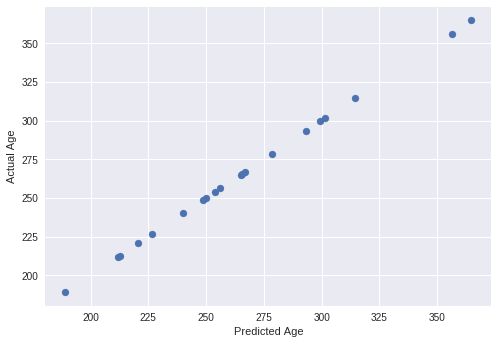

In [31]:
plt.scatter(y_model_4, df_y_test)
plt.xlabel("Predicted Age")
plt.ylabel("Actual Age")
plt.show()

In [32]:
#plotly

In [33]:
trace0 = Scatter(
    x = y_model_4.tolist(),
    y = df_y_test.Age,
    name = 'Predicted vs Actual Age',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4)
)

data = [trace0]

# Edit the layout
layout = dict(xaxis = dict(title = 'Predicted Age'),
              yaxis = dict(title = 'Actual Age'),
              )

fig = dict(data=data, layout=layout)
plot.iplot(fig, filename='Result.html')

In [34]:
SSE_new = ((y_model_4 - df_y_test.Age)**2).sum()
mean = df_y_test.Age.mean()
TSS = ((y_model_4 - mean)**2).sum()
R_Square_new = 1-(SSE_new/TSS)
R_Square_new

0.9999945135219832

In [35]:
RMSE = (((df_y_test.Age - mean)**2).sum()) * ((1 - R_Square_new)/100)
RMSE

0.0022090484640621888

# Box Plot

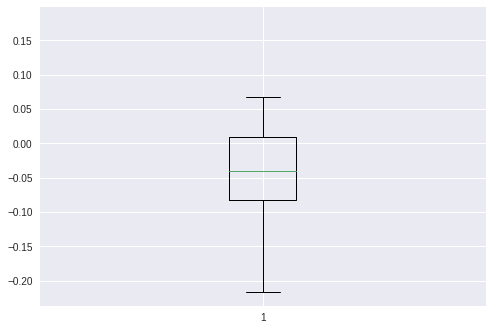

In [36]:
residual_new = np.array(y_model_4 - df_y_test.Age)
plt.boxplot(residual_new)
plt.show()

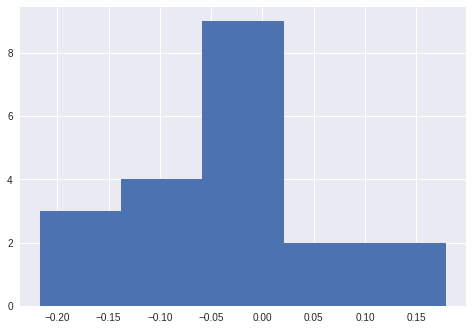

In [37]:
plt.hist(residual_new, bins=5)
plt.show()

In [38]:
# we plot histogram of residuals to check wheater the residuals are following NORAMAL DISTRIBUTION or not.

# Test Hypothesis

In [39]:
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(model_4.resid, model_4.model.exog)
list(zip(name,test))

[('F statistics', 1.6062570534404852), ('p_value', 0.07995053587229016)]

In [178]:
# to check the p value